In [1]:
import algos
import bandit
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from itertools import combinations
import utils

plt.rcParams['figure.figsize'] = [8, 4]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower

DS_NAME = None #None for synthesize, or {"LastFM"}
N_SWITCHES = 100
N_BANDITS = 3
OPT_SIZE = 2
HORIZON = 250
max_n_expert = len(list(combinations(np.arange(N_BANDITS),OPT_SIZE)))
N_EXPERT = None #None: All possible combinations
if N_EXPERT is not None:
    print(f'N_EXPERT = {N_EXPERT}')
    assert N_EXPERT<=max_n_expert, f"The number of expert ({N_EXPERT}) must be smaller than the maximum combination ({max_n_expert})"
assert N_BANDITS<=HORIZON, f"The number of arm ({N_BANDITS}) must be smaller than the horizon ({HORIZON})"
N_EXPS = 5 #Repeat experiments
kwargs = {'switches_cache_step': 10,
          'gap_constrain':0.3}

#MetaAlg params
N_UNBIASED_OBS = 1
ALG_NAME = 'ExpertMOSS'

## Regret vs Number of switches

  0%|          | 0/5 [00:00<?, ?it/s]

Optimal expert index = 2


/home/thangdn3/Desktop/meta-bandit/algos.py:287: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt((self.C3 - self.C1)/((self.C2 - self.C1)*2*(self.n_switches+1-self.cur_switch-1)))
100%|██████████| 5/5 [01:04<00:00, 12.85s/it]


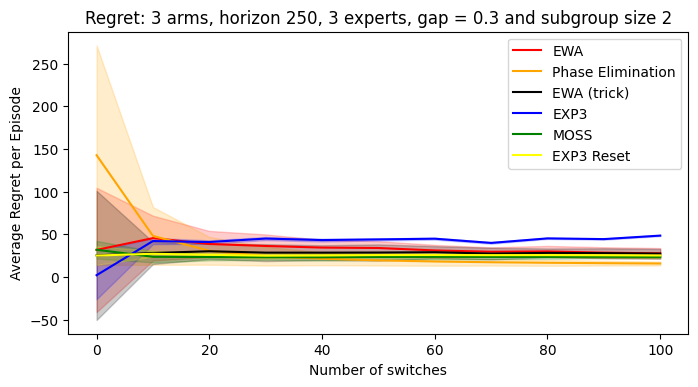

In [2]:
(X, meta_regrets, exp3_regrets, moss_regrets, exp3_reset_regrets, meta_trick_regrets, metaPE_regrets, title, xlabel, ylabel) = utils.switches_exp(N_EXPS, N_SWITCHES, N_BANDITS, HORIZON, 
                   N_UNBIASED_OBS, ALG_NAME, OPT_SIZE, N_EXPERT, DS_NAME, **kwargs)
pass

# if N_EXPERT is None:
#     N_EXPERT = env.n_experts
# X = np.arange(N_SWITCHES+1)
# env = bandit.MetaBernoulli(n_bandits=N_BANDITS, opt_size=OPT_SIZE, n_tasks=N_SWITCHES+1, 
#                        n_experts=N_EXPERT, ds_name=DS_NAME, **kwargs)
# meta_regrets = np.load('meta_regrets.npy')
# meta_trick_regrets = np.load('meta_trick_regrets.npy')
# exp3_regrets = np.load('exp3_regrets.npy')
# moss_regrets = np.load('moss_regrets.npy')
# exp3_reset_regrets = np.load('exp3_reset_regrets.npy')
# title = f'Regret: {N_BANDITS} arms, horizon {HORIZON}, {N_EXPERT} experts and subgroup size {OPT_SIZE}'
# xlabel, ylabel = 'Number of switches', 'Average Regret per Episode'
# step = kwargs['switches_cache_step']
# indices = np.arange(0, X.shape[0], step).astype(int)
# utils.plot(X[indices], meta_regrets[:,indices], exp3_regrets[:,indices], moss_regrets[:,indices], exp3_reset_regrets[:,indices], meta_trick_regrets[:,indices], title, xlabel, ylabel)

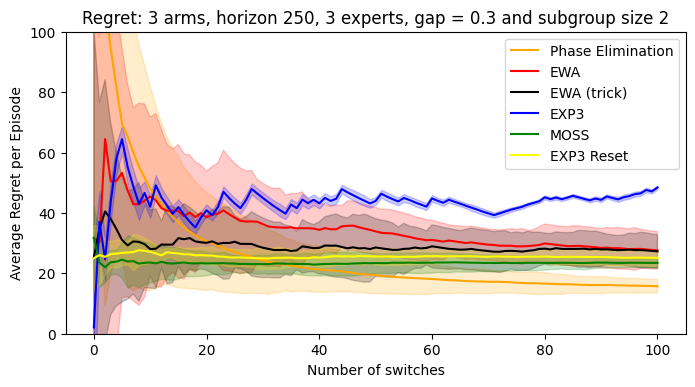

In [5]:
indices = np.arange(0, X.shape[0], kwargs['switches_cache_step']).astype(int)
meta_Y = np.mean(meta_regrets, axis=0)
meta_dY = 2*np.sqrt(np.var(meta_regrets, axis=0))
metaPE_Y = np.mean(metaPE_regrets, axis=0)
metaPE_dY = 2*np.sqrt(np.var(metaPE_regrets, axis=0))
meta_trick_Y = np.mean(meta_trick_regrets, axis=0)
meta_trick_dY = 2*np.sqrt(np.var(meta_trick_regrets, axis=0))
exp3_Y = np.mean(exp3_regrets, axis=0)
exp3_dY = 2*np.sqrt(np.var(exp3_regrets, axis=0))
exp3_reset_Y = np.mean(exp3_reset_regrets, axis=0)
exp3_reset_dY = 2*np.sqrt(np.var(exp3_reset_regrets, axis=0))
moss_Y = np.mean(moss_regrets, axis=0)
moss_dY = 2*np.sqrt(np.var(moss_regrets, axis=0))
plt.plot(X, metaPE_Y, '-', color='orange', label = "Phase Elimination")
plt.fill_between(X, metaPE_Y - metaPE_dY, metaPE_Y + metaPE_dY, color='orange', alpha=0.2)
plt.plot(X, meta_Y, '-', color='red', label = "EWA")
plt.fill_between(X, meta_Y - meta_dY, meta_Y + meta_dY, color='red', alpha=0.2)
plt.plot(X, meta_trick_Y, '-', color='black', label = "EWA (trick)")
plt.fill_between(X, meta_trick_Y - meta_trick_dY, meta_trick_Y + meta_trick_dY, color='black', alpha=0.2)
plt.plot(X, exp3_Y, '-', color='blue', label = "EXP3")
plt.fill_between(X, exp3_Y - exp3_dY, exp3_Y + exp3_dY, color='blue', alpha=0.2)
plt.plot(X, moss_Y, '-', color='green', label = "MOSS")
plt.fill_between(X, moss_Y - moss_dY, moss_Y + moss_dY, color='green', alpha=0.2)
plt.plot(X, exp3_reset_Y, '-', color='yellow', label = "EXP3 Reset")
plt.fill_between(X, exp3_reset_Y - exp3_reset_dY, exp3_reset_Y + exp3_reset_dY, color='yellow', alpha=0.2)
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.ylim([0, 100])
# plt.yscale('log')
plt.legend()
plt.title(title)
pass

## Regret vs Horizon

  0%|          | 0/5 [00:00<?, ?it/s]

Optimal expert index = 0


/home/thangdn3/Desktop/meta-bandit/algos.py:287: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt((self.C3 - self.C1)/((self.C2 - self.C1)*2*(self.n_switches+1-self.cur_switch-1)))
100%|██████████| 5/5 [05:32<00:00, 66.58s/it]


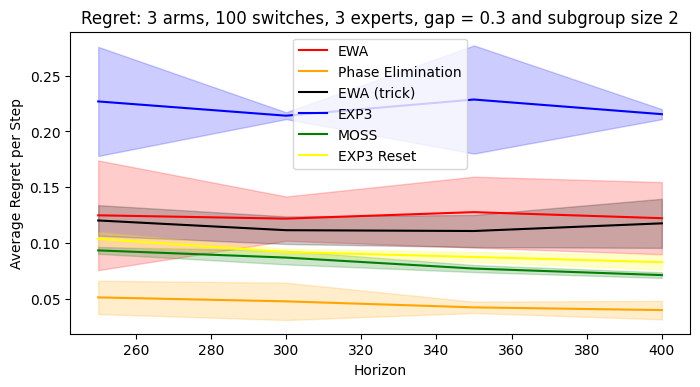

In [13]:
horizon_list = np.arange(250, 410, 50)
# horizon_list = np.array([1, 100, 300])
(X_h, meta_regrets_h, exp3_regrets_h, moss_regrets_h, exp3_reset_regrets_h, 
 meta_trick_regrets_h, metaPE_regrets_h, title, xlabel, ylabel) = 
utils.horizon_exp(N_EXPS, N_SWITCHES, N_BANDITS, N_UNBIASED_OBS, ALG_NAME, OPT_SIZE, N_EXPERT, 
                  DS_NAME, horizon_list = horizon_list, **kwargs)
pass

# N_EXPS = 100
# N_SWITCHES = 3000
# env = bandit.MetaBernoulli(n_bandits=N_BANDITS, opt_size=OPT_SIZE, n_tasks=N_SWITCHES+1, 
#                        n_experts=N_EXPERT, ds_name=DS_NAME, **kwargs)
# X = np.array([1, 100, 300])
# meta_regrets = np.load('meta_regrets_h.npy')
# exp3_regrets = np.load('exp3_regrets_h.npy')
# moss_regrets = np.load('moss_regrets_h.npy')
# exp3_reset_regrets = np.load('exp3_reset_regrets_h.npy')
# if N_EXPERT is None:
#     N_EXPERT = env.n_experts
# title = f'Regret: {N_EXPS} experiments, {N_BANDITS} arms, {N_SWITCHES} switches, {N_EXPERT} experts and subgroup size {OPT_SIZE}'
# xlabel, ylabel = 'Horizon', 'Average Regret per Step'
# utils.plot(X, meta_regrets, exp3_regrets, moss_regrets, exp3_reset_regrets, meta_regrets, title, xlabel, ylabel)

## Regret vs # of arm

  0%|          | 0/3 [00:00<?, ?it/s]

Optimal expert index = 2



 33%|███▎      | 1/3 [00:51<01:43, 51.67s/it]

Optimal expert index = 2



 67%|██████▋   | 2/3 [01:43<00:51, 51.75s/it]

Optimal expert index = 6



  0%|          | 0/3 [00:00<?, ?it/s]

Optimal expert index = 1



 33%|███▎      | 1/3 [00:52<01:45, 52.59s/it]

Optimal expert index = 3



 67%|██████▋   | 2/3 [01:45<00:52, 52.60s/it]

Optimal expert index = 7



  0%|          | 0/3 [00:00<?, ?it/s]

Optimal expert index = 0



 33%|███▎      | 1/3 [00:51<01:43, 51.77s/it]

Optimal expert index = 2



 67%|██████▋   | 2/3 [01:43<00:51, 51.92s/it]

Optimal expert index = 0



  0%|          | 0/3 [00:00<?, ?it/s]

Optimal expert index = 2



 33%|███▎      | 1/3 [00:52<01:45, 52.55s/it]

Optimal expert index = 5



 67%|██████▋   | 2/3 [01:45<00:52, 52.69s/it]

Optimal expert index = 1



  0%|          | 0/3 [00:00<?, ?it/s]

Optimal expert index = 0



 33%|███▎      | 1/3 [00:51<01:42, 51.16s/it]

Optimal expert index = 4



 67%|██████▋   | 2/3 [01:43<00:51, 51.77s/it]

Optimal expert index = 5



100%|██████████| 5/5 [13:02<00:00, 156.44s/it]


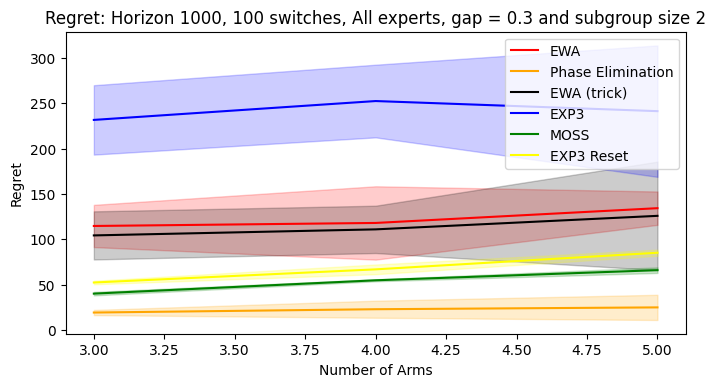

In [12]:
n_bandits_list = np.arange(3,6,1)
h = 1000
(X_b, meta_regrets_b, exp3_regrets_b, moss_regrets_b, exp3_reset_regrets_b, 
 meta_trick_regrets_b, metaPE_regrets_b, title, xlabel, ylabel) = 
utils.arm_exp(N_EXPS, N_SWITCHES, h, N_UNBIASED_OBS, ALG_NAME, 
              OPT_SIZE, N_EXPERT, DS_NAME, n_bandits_list, **kwargs)
pass

## Regret vs subgroup size

  0%|          | 0/3 [00:00<?, ?it/s]

Optimal expert index = 3


/home/thangdn3/Desktop/meta-bandit/algos.py:287: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt((self.C3 - self.C1)/((self.C2 - self.C1)*2*(self.n_switches+1-self.cur_switch-1)))

 33%|███▎      | 1/3 [00:41<01:22, 41.46s/it]

Optimal expert index = 9



 67%|██████▋   | 2/3 [01:22<00:41, 41.37s/it]

Optimal expert index = 1



  0%|          | 0/3 [00:00<?, ?it/s]

Optimal expert index = 2



 33%|███▎      | 1/3 [00:40<01:21, 40.91s/it]

Optimal expert index = 2



 67%|██████▋   | 2/3 [01:21<00:41, 41.01s/it]

Optimal expert index = 2



  0%|          | 0/3 [00:00<?, ?it/s]

Optimal expert index = 2



 33%|███▎      | 1/3 [00:41<01:22, 41.23s/it]

Optimal expert index = 8



 67%|██████▋   | 2/3 [01:22<00:41, 41.32s/it]

Optimal expert index = 0



  0%|          | 0/3 [00:00<?, ?it/s]

Optimal expert index = 1



 33%|███▎      | 1/3 [00:41<01:23, 41.64s/it]

Optimal expert index = 3



 67%|██████▋   | 2/3 [01:23<00:42, 42.05s/it]

Optimal expert index = 6



  0%|          | 0/3 [00:00<?, ?it/s]

Optimal expert index = 0



 33%|███▎      | 1/3 [00:41<01:22, 41.41s/it]

Optimal expert index = 3



 67%|██████▋   | 2/3 [01:22<00:41, 41.50s/it]

Optimal expert index = 5



100%|██████████| 5/5 [10:22<00:00, 124.51s/it]


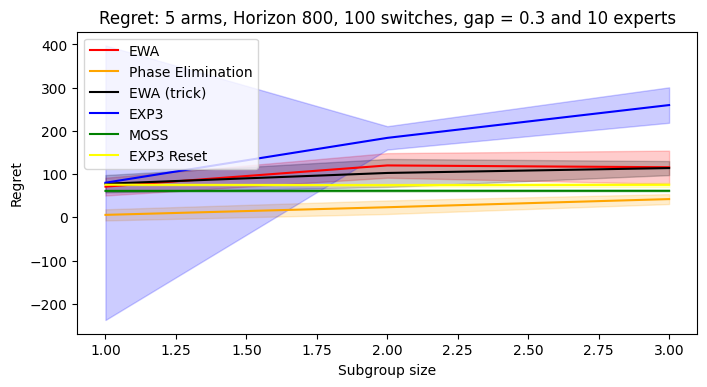

In [21]:
b = 5
h = 800
(X_e, meta_regrets_e, exp3_regrets_e, moss_regrets_e, exp3_reset_regrets_e, 
 meta_trick_regrets_e, metaPE_regrets_e, title, xlabel, ylabel) = utils.subgroup_size_exp(N_EXPS, 
                                  N_SWITCHES, b, h, N_UNBIASED_OBS, ALG_NAME, N_EXPERT, DS_NAME, 
                                  opt_size_list = np.arange(1,N_BANDITS+1,1), **kwargs)
pass

## Regret vs # of experts

In [ ]:
# utils.experts_exp(N_EXPS, N_SWITCHES, N_BANDITS, HORIZON, N_UNBIASED_OBS, ALG_NAME, OPT_SIZE, 
#                   DS_NAME, n_experts_list = np.arange(10,min(411,max_n_expert),20), **kwargs)
# pass

# LastFM Experiment

In [36]:
DS_NAME = 'LastFM'
N_EXPS = 40
HORIZON = 30
N_BANDITS = 9 # LastFM: Bandit/Count_threshold/N_SWITCHES/OPT_SIZE = 3/48/650/2, 4/40/689/2, 6/24/568/2, 9/22/935/4
COUNT_THRESHOLD = 22
N_SWITCHES = 500
OPT_SIZE = 2
kwargs['count_threshold'] = COUNT_THRESHOLD

# topK: opt and subopt from top K artists
# clean: meta assumption
# randSub: top K opt and rand sub opt
kwargs['lastFM_clean_mode'] = 'clean'

  0%|          | 0/40 [00:00<?, ?it/s]

Keeping only 9/17632 artists that are most favorited by more than 22/1892 people.
There are 1384 users that interested in at least 1/9 artists.
There are 512 users that their favorite artist is in a subgroup of size 2.
Optimal expert index = 22


100%|██████████| 40/40 [04:25<00:00,  6.63s/it]


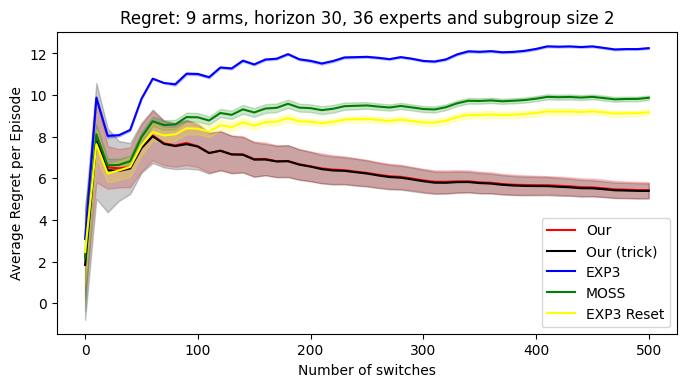

In [37]:
cache = utils.switches_exp(N_EXPS, N_SWITCHES, N_BANDITS, HORIZON, N_UNBIASED_OBS, ALG_NAME, 
                   OPT_SIZE, N_EXPERT, DS_NAME, **kwargs)

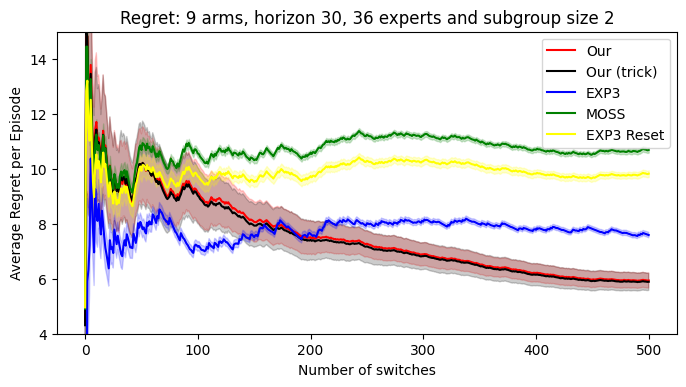

In [35]:
X, meta_regrets, exp3_regrets, moss_regrets, exp3_reset_regrets, meta_trick_regrets, title, xlabel, ylabel = cache
indices = np.arange(0, X.shape[0], kwargs['switches_cache_step']).astype(int)
meta_Y = np.mean(meta_regrets, axis=0)
meta_dY = 2*np.sqrt(np.var(meta_regrets, axis=0))
meta_trick_Y = np.mean(meta_trick_regrets, axis=0)
meta_trick_dY = 2*np.sqrt(np.var(meta_trick_regrets, axis=0))
exp3_Y = np.mean(exp3_regrets, axis=0)
exp3_dY = 2*np.sqrt(np.var(exp3_regrets, axis=0))
exp3_reset_Y = np.mean(exp3_reset_regrets, axis=0)
exp3_reset_dY = 2*np.sqrt(np.var(exp3_reset_regrets, axis=0))
moss_Y = np.mean(moss_regrets, axis=0)
moss_dY = 2*np.sqrt(np.var(moss_regrets, axis=0))
plt.plot(X, meta_Y, '-', color='red', label = "Our")
plt.fill_between(X, meta_Y - meta_dY, meta_Y + meta_dY, color='red', alpha=0.2)
plt.plot(X, meta_trick_Y, '-', color='black', label = "Our (trick)")
plt.fill_between(X, meta_trick_Y - meta_trick_dY, meta_trick_Y + meta_trick_dY, color='black', alpha=0.2)
plt.plot(X, exp3_Y, '-', color='blue', label = "EXP3")
plt.fill_between(X, exp3_Y - exp3_dY, exp3_Y + exp3_dY, color='blue', alpha=0.2)
plt.plot(X, moss_Y, '-', color='green', label = "MOSS")
plt.fill_between(X, moss_Y - moss_dY, moss_Y + moss_dY, color='green', alpha=0.2)
plt.plot(X, exp3_reset_Y, '-', color='yellow', label = "EXP3 Reset")
plt.fill_between(X, exp3_reset_Y - exp3_reset_dY, exp3_reset_Y + exp3_reset_dY, color='yellow', alpha=0.2)
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.ylim([4,15])
# plt.yscale('log')
plt.legend()
plt.title(title)
pass

In [6]:
# COUNT_THRESHOLD = 40
# N_BANDITS = 4 # LastFM: Bandit/Count_threshold = 5/30 , 4/40, 3/48
# horizon_list = np.arange(5, 56, 5)

# horizon_list = np.array([1, 100, 300])
cache_h = utils.horizon_exp(N_EXPS, N_SWITCHES, N_BANDITS, N_UNBIASED_OBS, ALG_NAME, OPT_SIZE, N_EXPERT, 
                  DS_NAME, horizon_list = horizon_list, quiet=True, **kwargs)

NameError: name 'horizon_list' is not defined

Keeping only 89/17632 artists that are most favorited by more than 4/1892 people.
Keeping only 89/17632 artists that are most favorited by more than 4/1892 people.
Keeping only 89/17632 artists that are most favorited by more than 4/1892 people.
Keeping only 89/17632 artists that are most favorited by more than 4/1892 people.
Keeping only 89/17632 artists that are most favorited by more than 4/1892 people.
Keeping only 89/17632 artists that are most favorited by more than 4/1892 people.
Keeping only 89/17632 artists that are most favorited by more than 4/1892 people.
Keeping only 89/17632 artists that are most favorited by more than 4/1892 people.
Keeping only 89/17632 artists that are most favorited by more than 4/1892 people.
Keeping only 89/17632 artists that are most favorited by more than 4/1892 people.
Keeping only 89/17632 artists that are most favorited by more than 4/1892 people.
Keeping only 89/17632 artists that are most favorited by more than 4/1892 people.
Keeping only 89/

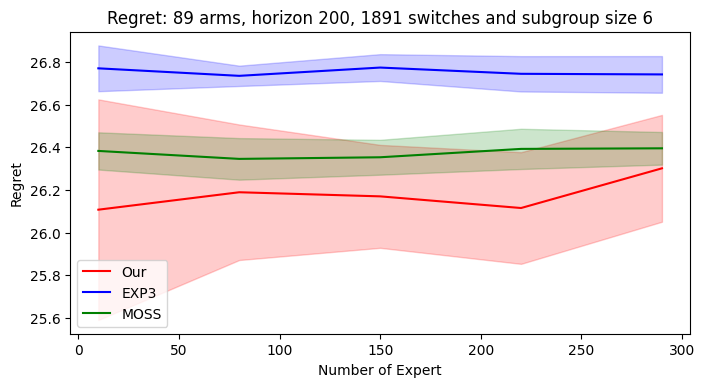

In [24]:
cache_e = utils.experts_exp(N_EXPS, N_SWITCHES, N_BANDITS, HORIZON, N_UNBIASED_OBS, ALG_NAME, OPT_SIZE, 
                  DS_NAME, n_experts_list = np.arange(10,300,70), **kwargs)

Keeping only 89/17632 artists that are most favorited by more than 4/1892 people.
Keeping only 89/17632 artists that are most favorited by more than 4/1892 people.
Keeping only 89/17632 artists that are most favorited by more than 4/1892 people.
Keeping only 89/17632 artists that are most favorited by more than 4/1892 people.
Keeping only 89/17632 artists that are most favorited by more than 4/1892 people.
Keeping only 89/17632 artists that are most favorited by more than 4/1892 people.
Keeping only 89/17632 artists that are most favorited by more than 4/1892 people.
Keeping only 89/17632 artists that are most favorited by more than 4/1892 people.
Keeping only 89/17632 artists that are most favorited by more than 4/1892 people.
Keeping only 89/17632 artists that are most favorited by more than 4/1892 people.
Keeping only 89/17632 artists that are most favorited by more than 4/1892 people.
Keeping only 89/17632 artists that are most favorited by more than 4/1892 people.
Keeping only 89/

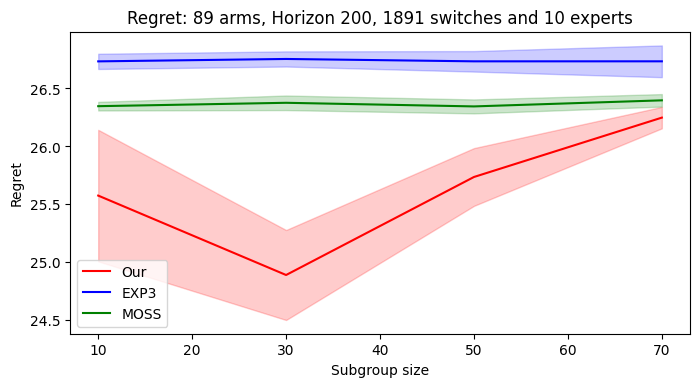

In [12]:
cache_s = utils.subgroup_size_exp(N_EXPS, N_SWITCHES, N_BANDITS, HORIZON, N_UNBIASED_OBS, ALG_NAME, N_EXPERT, 
                        DS_NAME, opt_size_list = np.arange(10,80,20), **kwargs)